<a href="https://colab.research.google.com/github/vijji5432/Zeotap_Assignment/blob/main/Alekhya_Vijji_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

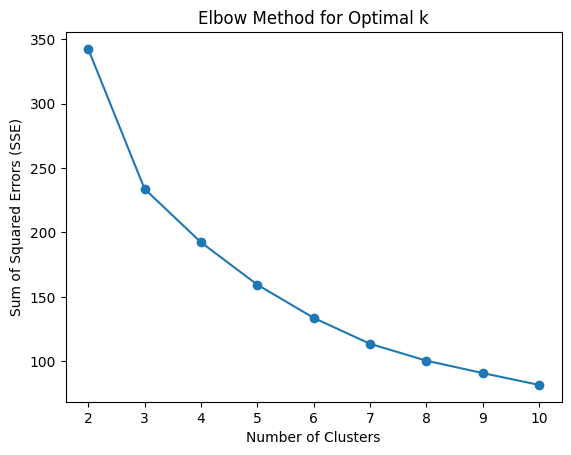

Davies-Bouldin Index: 0.9448
Silhouette Score: 0.3307


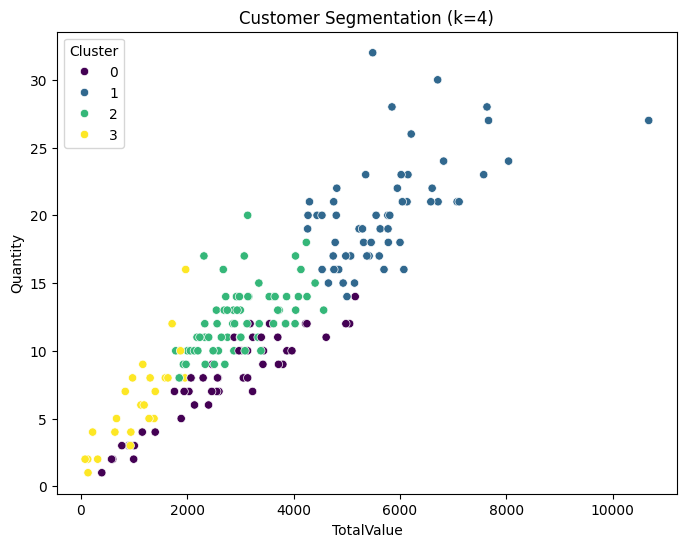

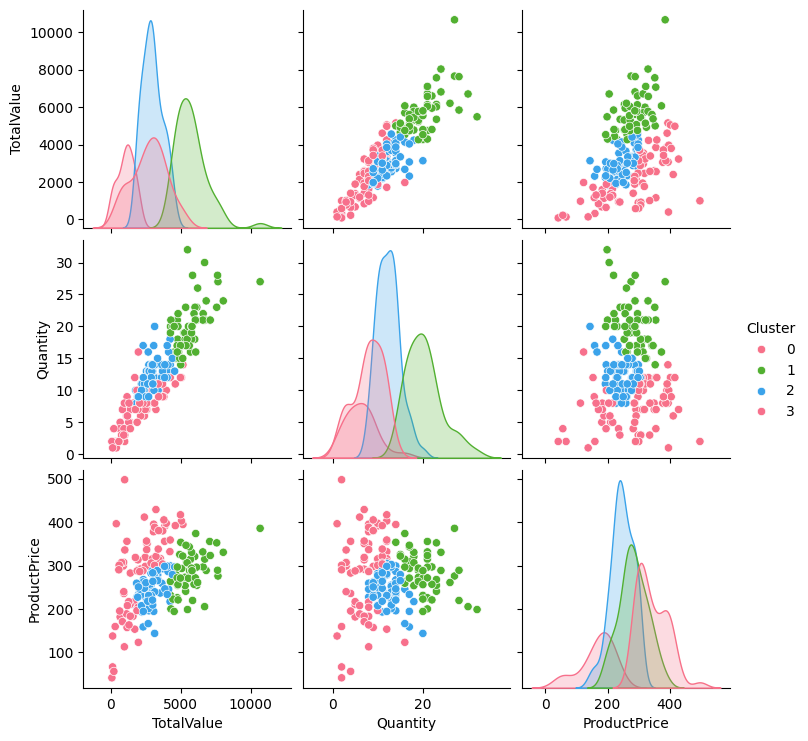

In [11]:

#Customer Segmentation (Clustering)

# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load and Merge Data
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")
products = pd.read_csv("/content/Products.csv")

merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged_df.rename(columns={"Price_x": "TransactionPrice", "Price_y": "ProductPrice"}, inplace=True)

#  Use customer transaction summary for clustering
clustering_data = customer_features.copy()
clustering_data.set_index("CustomerID", inplace=True)

#  Normalize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

#  Determine the Optimal Number of Clusters (Elbow Method)
sse = []
for k in range(2, 11):  # Checking for 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Apply KMeans with Optimal Clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clustering_data["Cluster"] = kmeans.fit_predict(scaled_data)

#  Calculate Clustering Metrics
db_index = davies_bouldin_score(scaled_data, clustering_data["Cluster"])
silhouette_avg = silhouette_score(scaled_data, clustering_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

#  Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_data["TotalValue"],
    y=clustering_data["Quantity"],
    hue=clustering_data["Cluster"],
    palette="viridis"
)
plt.title(f"Customer Segmentation (k={optimal_k})")
plt.legend(title="Cluster")
plt.show()

#  Plot Pairplot for More Insights
sns.pairplot(clustering_data, hue="Cluster", palette="husl")
plt.show()

